In [26]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [27]:
datapath = '../../../data/antenna-only/'
cases = ['no-antenna', 'single-antenna', 'dual-antenna']

In [28]:
case1 = 'single-antenna'
case2 = 'dual-antenna'
case1_data = np.load(os.path.join(datapath, case1, 'recording.npy'))
case2_data = np.load(os.path.join(datapath, case2, 'recording.npy'))

In [29]:
cfg = np.load(os.path.join(datapath, case1, 'config.npy'), allow_pickle=True).item()
nfft = cfg['nfft']
dist_vec = cfg['dist_vec']

In [30]:
# Interweave case1_data and case2_data every n samples
interleave_n = 5
nframes = case1_data.shape[0]
interleaved_data = np.zeros((nframes, 150), dtype=np.complex64)
for i in range(nframes // (interleave_n * 2)):
    interleaved_data[(2*i) * interleave_n:(2*i+1) * interleave_n, :] = case1_data[(i) * interleave_n:(i+1) * interleave_n, 0, :]
    interleaved_data[(2*i+1) * interleave_n:(2*i+2) * interleave_n, :] = case2_data[(i) * interleave_n:(i+1) * interleave_n, 0, :]
interleaved_data.shape

(100, 150)

Text(0.5, 1.0, 'Across-frame weave, RP')

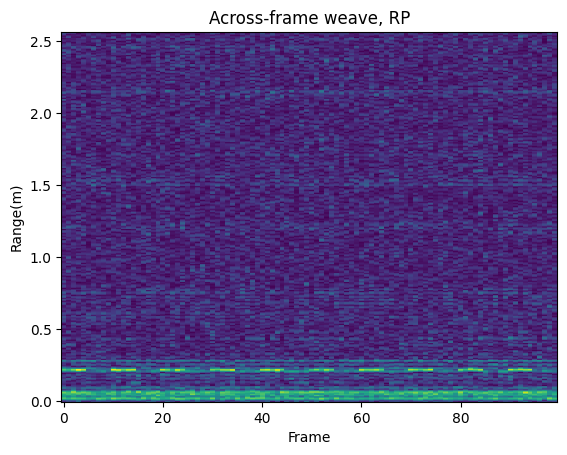

In [31]:
rp = np.fft.ifft(interleaved_data, axis=1, n=nfft)
plt.pcolormesh(np.arange(100), dist_vec[:-100], np.abs(rp[:, :-100]).T)
plt.xlabel("Frame")
plt.ylabel("Range(m)")
plt.title("Across-frame weave, RP")

Text(0.5, 1.0, 'Across-frame weave, RD')

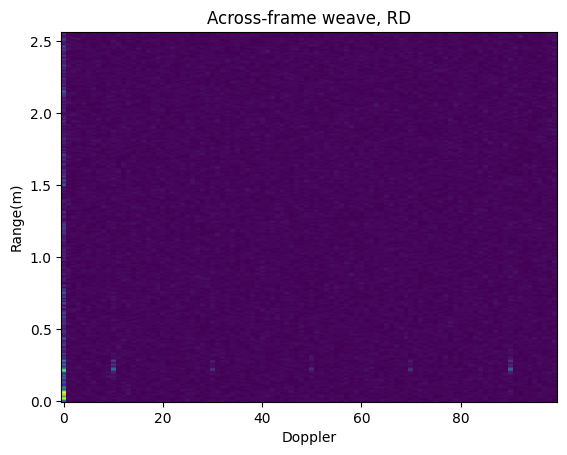

In [32]:
rd = np.fft.fft(rp, axis=0)
plt.pcolormesh(np.arange(100), dist_vec[:-100], np.abs(rd[:, :-100]).T)
plt.xlabel("Doppler")
plt.ylabel("Range(m)")
plt.title("Across-frame weave, RD")

In [33]:
interleave_instep = 10
interleave_instep_data = np.zeros_like(case1_data)
for i in range(150):
    if (i / interleave_instep) % 2 == 1:
        interleave_instep_data[:, i, :] = case1_data[:, i, :]
    else:
        interleave_instep_data[:, i, :] = case2_data[:, i, :]

Text(0.5, 1.0, 'In-step weave, RP')

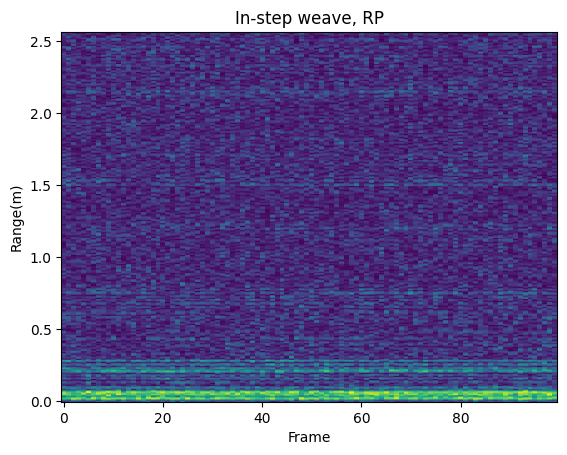

In [34]:
rp_instep = np.fft.ifft(interleave_instep_data[:, 0, :], axis=1, n=nfft)
plt.pcolormesh(np.arange(100), dist_vec[:-100], np.abs(rp_instep[:, :-100]).T)
plt.xlabel("Frame")
plt.ylabel("Range(m)")
plt.title("In-frame weave, RP")

Text(0.5, 1.0, 'In-frame weave, RD')

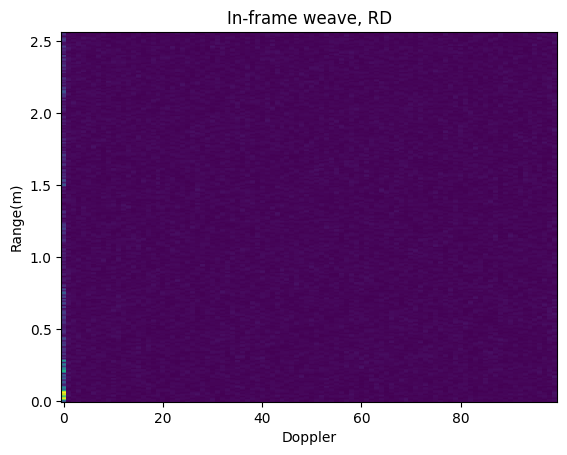

In [38]:
rd_instep = np.fft.fft(rp_instep, axis=0)
plt.pcolormesh(np.arange(100), dist_vec[:-100], np.abs(rd_instep[:, :-100]).T)
plt.xlabel("Doppler")
plt.ylabel("Range(m)")
plt.title("In-frame weave, RD")

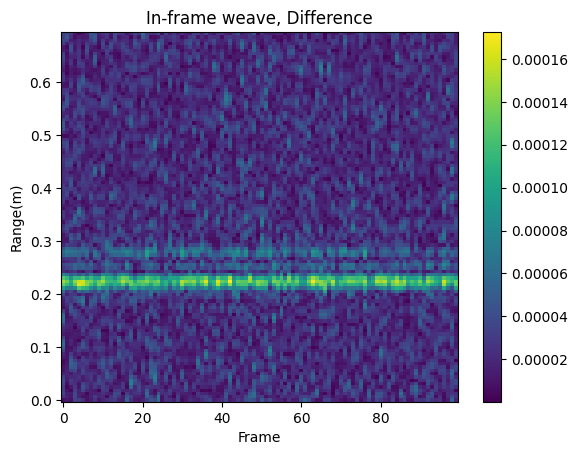

In [51]:
case1_rp = np.fft.ifft(case1_data[:, 0, :], axis=1, n=nfft)
# plt.pcolormesh(np.arange(100), dist_vec[:-100], np.abs(rp_instep[:, :-100]).T - np.abs(case1_rp[:, :-100]).T)
plt.pcolormesh(np.arange(100), dist_vec[:-400], np.abs(rp_instep[:, :-400] - case1_rp[:, :-400]).T)
plt.xlabel("Frame")
plt.ylabel("Range(m)")
plt.title("In-frame weave, Difference")
plt.colorbar()